# Sentiment text mining for tourists accommodation review data set

In [2]:
# importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import seaborn as sns
from wordcloud import WordCloud
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
from nltk.probability import FreqDist
nltk.download(['stopwords', 'punkt', 'omw-1.4', 'vader_lexicon'])
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [4]:
# loadind dataset 

tourism = pd.read_csv('tourist_accommodation_reviews.csv', encoding='Windows-1252')

In [5]:
# Exploring the dataset: viewing the first few observations

tourism.head()

,ID,Review Date,Location,Hotel/Restaurant name,Review
0,rn579778340,Reviewed 1 week ago,Kathu,Thong Dee The Kathu Brasserie,Just been for sunday roast lamb and beef truly...
1,rn576350875,Reviewed 3 weeks ago,Kathu,Thong Dee The Kathu Brasserie,"Quietly set off the main road, nice atmosphere..."
2,rn574921678,Reviewed 4 weeks ago,Kathu,Thong Dee The Kathu Brasserie,I made a reservation for a birthday two days i...
3,rn572905503,"Reviewed April 12, 2018",Kathu,Thong Dee The Kathu Brasserie,We visit here regularly and never fail to be i...
4,rn572364712,"Reviewed April 10, 2018",Kathu,Thong Dee The Kathu Brasserie,Visited this wonderful place on my travels and...


In [6]:
# Exploring the dataset: viewing the last few observations

tourism.tail()

,ID,Review Date,Location,Hotel/Restaurant name,Review
53639,rn162368197,"Reviewed May 29, 2013",Patong,Bite in,"I love this small restaurant, for the great fo..."
53640,rn161843734,"Reviewed May 25, 2013",Patong,Bite in,We stopped at this restaurant after shopping a...
53641,rn161734077,"Reviewed May 24, 2013",Patong,Bite in,"Great times ,This is one of the best restauran..."
53642,rn161218072,"Reviewed May 19, 2013",Patong,Bite in,"Bite in, it has become my favorite restaurant ..."
53643,rn161212765,"Reviewed May 19, 2013",Patong,Bite in,The restaurant put in a good location in Jungc...


In [7]:
# Exploring the dataset: viewing the number of rows and columns in the dataset

tourism.shape

(53644, 5)

In [8]:
# Exploring the dataset: understaing the data type of each feature

tourism.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53644 entries, 0 to 53643
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   ID                     53644 non-null  object
 1   Review Date            53644 non-null  object
 2   Location               53644 non-null  object
 3   Hotel/Restaurant name  53644 non-null  object
 4   Review                 53644 non-null  object
dtypes: object(5)
memory usage: 2.0+ MB


In [9]:
# Exploring the dataset: viewing the descriptive statistics of the dataset

tourism.describe()

,ID,Review Date,Location,Hotel/Restaurant name,Review
count,53644,53644,53644,53644,53644
unique,49944,2344,25,537,49938
top,rn564592095,Reviewed 1 week ago,Patong,Da Mario,I have been to this restaurant several times f...
freq,10,616,16403,279,10


In [12]:
# Exploring the dataset: viewing number of reviews per location

tourism.groupby('Location')['Review'].count().sort_values(ascending=False)

Location
 Patong              16403
 Karon                5826
 Kata Beach           5752
 Rawai                3811
 Choeng Thale         3378
 Phuket Town          3356
 Kamala               3162
 Mai Khao             2372
 Cape Panwa           1500
 Chalong              1287
 Thalang District     1177
 Kathu                1078
 Nai Yang              996
 Nai Harn              881
 Bang Tao Beach        600
 Karon Beach           397
 Wichit                395
 Talat Yai             300
 Koh Kaew              293
 Kata Noi Beach        200
 Pa Khlok              100
 Ratsada                98
 Talat Nuea             97
 Nai Thon               94
 Sakhu                  91
Name: Review, dtype: int64

In [13]:
# Exploring the dataset: viewing number of reviews per restaurant

tourism.groupby('Hotel/Restaurant name')['Review'].count().sort_values(ascending=False)

Hotel/Restaurant name
Da Mario                                             279
No.6 Restaurant                                      200
Sabai Sabai                                          200
The Pizza Company                                    198
The Family Restaurant                                196
                                                    ... 
Sultan's Grill Authentic Turkish & Indian Cuisine     91
+39 Italian Street Food                               91
Chez Nicolas                                          90
Dada Yura Restaurant                                  80
Chekhoff Restaurant and Bar                           30
Name: Review, Length: 537, dtype: int64

In [27]:
# function for text preprocessing

def preprocess_text(text):
    
    # instantiating the nltk tokennizer
    tokenizer = nltk.tokenize.RegexpTokenizer('[a-zA-Z0-9\']+')
    
    # applying the tokenizer to the text document
    tokenize_document = tokenizer.tokenize(text)
    
    # generating the stop words corpus
    stop_words = nltk.corpus.stopwords.words('english')
    
    # selecting clean words (words without the stop words)
    cleaned_token = [word.lower() for word in tokenize_document if word.lower() not in stop_words ]
    
    # applying the Porter's stemmer algorithm to select the root word of words with variant
    stemmed_text = [nltk.stem.PorterStemmer().stem(word) for word in cleaned_token]
    return stemmed_text

In [58]:
# deciding the restaurants to select(restaurant with the top 30 reviews)

tour_patong = tour[tour['Location']==' Patong']
tour_patong.groupby('Hotel/Restaurant name')['Review'].count().sort_values(ascending=False)

Hotel/Restaurant name
No.6 Restaurant                        200
Da Mario                               187
3 Spices Restaurant                    100
Royal India Restaurant Patong          100
Pum Thai Restaurant                    100
Restaurant Break Point                 100
Restaurant at Lillo Island Resort      100
Roma Ristorante & Pizzeria Da Mauro    100
Rosco's Restaurant & Sports Bar        100
Ruen Thai, Patong                      100
Pizzeria Hut 1                         100
Rustic - Eatery & Bar                  100
S&G Family Restaurant                  100
Sabai Beach Restaurant                 100
Sabai Sabai                            100
Sala Bua Restaurant                    100
Salute Italian Restaurant              100
Sam's Steaks and Grill                 100
Poo Nurntong Restaurant                100
Patong Seafood                         100
Savoey Restaurant                      100
Patong Corner Restaurant               100
Linda Seafood                   

In [16]:
# instantiating the class SentimentIntensityAnalyzer and application of generate polarity score on the selected dataset

sentiment = SentimentIntensityAnalyzer()

tourism['compound'] = [sentiment.polarity_scores(review)['compound'] for review in tourism['Review']]
tourism['neg'] = [sentiment.polarity_scores(review)['neg'] for review in tourism['Review']]
tourism['neu'] = [sentiment.polarity_scores(review)['neu'] for review in tourism['Review']]
tourism['pos'] = [sentiment.polarity_scores(review)['pos'] for review in tourism['Review']]

In [17]:
# exploring the first few observations of the polarity score for the restaurant dataset

tourism.head()

,ID,Review Date,Location,Hotel/Restaurant name,Review,compound,neg,neu,pos
0,rn579778340,Reviewed 1 week ago,Kathu,Thong Dee The Kathu Brasserie,Just been for sunday roast lamb and beef truly...,0.0516,0.11,0.772,0.118
1,rn576350875,Reviewed 3 weeks ago,Kathu,Thong Dee The Kathu Brasserie,"Quietly set off the main road, nice atmosphere...",0.9237,0.00,0.730,0.270
2,rn574921678,Reviewed 4 weeks ago,Kathu,Thong Dee The Kathu Brasserie,I made a reservation for a birthday two days i...,0.6808,0.00,0.869,0.131
3,rn572905503,"Reviewed April 12, 2018",Kathu,Thong Dee The Kathu Brasserie,We visit here regularly and never fail to be i...,0.8419,0.00,0.823,0.177
4,rn572364712,"Reviewed April 10, 2018",Kathu,Thong Dee The Kathu Brasserie,Visited this wonderful place on my travels and...,0.9734,0.00,0.557,0.443


In [78]:
# exploring thr descriptive statistics of the tourism dataset polairty score

restaurant30[['compound', 'neg', 'neu', 'pos']].describe()

,compound,neg,neu,pos
count,3187.000000,3187.000000,3187.000000,3187.000000
mean,0.635269,0.028273,0.745078,0.226656
std,0.440201,0.052580,0.125646,0.135218
min,-0.962300,0.000000,0.248000,0.000000
25%,0.526700,0.000000,0.664000,0.125000
50%,0.830800,0.000000,0.751000,0.218000
75%,0.921700,0.045000,0.836000,0.316000
max,0.993000,0.377000,1.000000,0.752000


<AxesSubplot:xlabel='compound', ylabel='Count'>

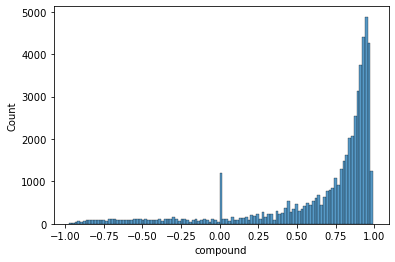

In [18]:
# viewing the distribution of the compound scores

sns.histplot(tourism['compound'])

<AxesSubplot:xlabel='pos', ylabel='Count'>

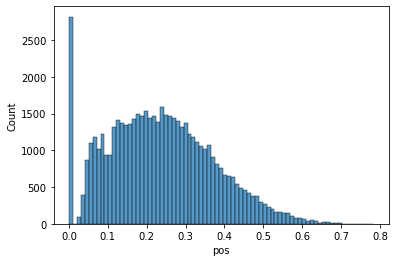

In [19]:
# viewing the distribution of the positive scores

sns.histplot(tourism['pos'])

<AxesSubplot:xlabel='neu', ylabel='Count'>

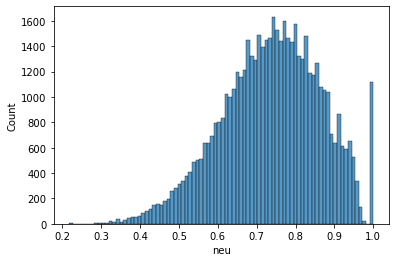

In [20]:
# viewing the distribution of neutral score

sns.histplot(tourism['neu'])

<AxesSubplot:xlabel='neg', ylabel='Count'>

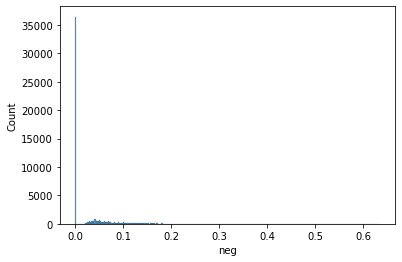

In [21]:
# viewing the distribution of nagative scores

sns.histplot(tourism['neg'])

In [22]:
# number of negative review for each Hotels

neg_count = (tourism['compound']<=0).groupby(tourism['Hotel/Restaurant name']).sum().sort_values(ascending=False)
neg_count

Hotel/Restaurant name
Da Mario                           49
Outdoor Restaurant                 48
The Pizza Company                  45
La Casa                            44
Dada Yura Restaurant               40
                                   ..
Rock Salt                           1
Out of the Blue Bar                 1
Curry Delight Indian Restaurant     1
Chekhoff Restaurant and Bar         0
Golbasi                             0
Name: compound, Length: 537, dtype: int64

In [23]:
# % of negative reviews for each hotels

pct_negative = pd.DataFrame(neg_count/(tourism['Hotel/Restaurant name'].groupby(tourism['Hotel/Restaurant name']).count())*100,
                           columns=['% of Negative Reviews']).sort_values(by='% of Negative Reviews', ascending=False)
pct_negative

,% of Negative Reviews
Hotel/Restaurant name,
Dada Yura Restaurant,50.000000
La Casa,45.833333
Pizza Hut - Jungceylon,39.393939
Restaurant La Croisette,38.297872
Mama Restaurant - Karon Beach,37.000000
...,...
Curry Delight Indian Restaurant,1.000000
Sam's Steaks and Grill,1.000000
Rock Salt,1.000000


<AxesSubplot:xlabel='% of Negative Reviews', ylabel='Hotel/Restaurant name'>

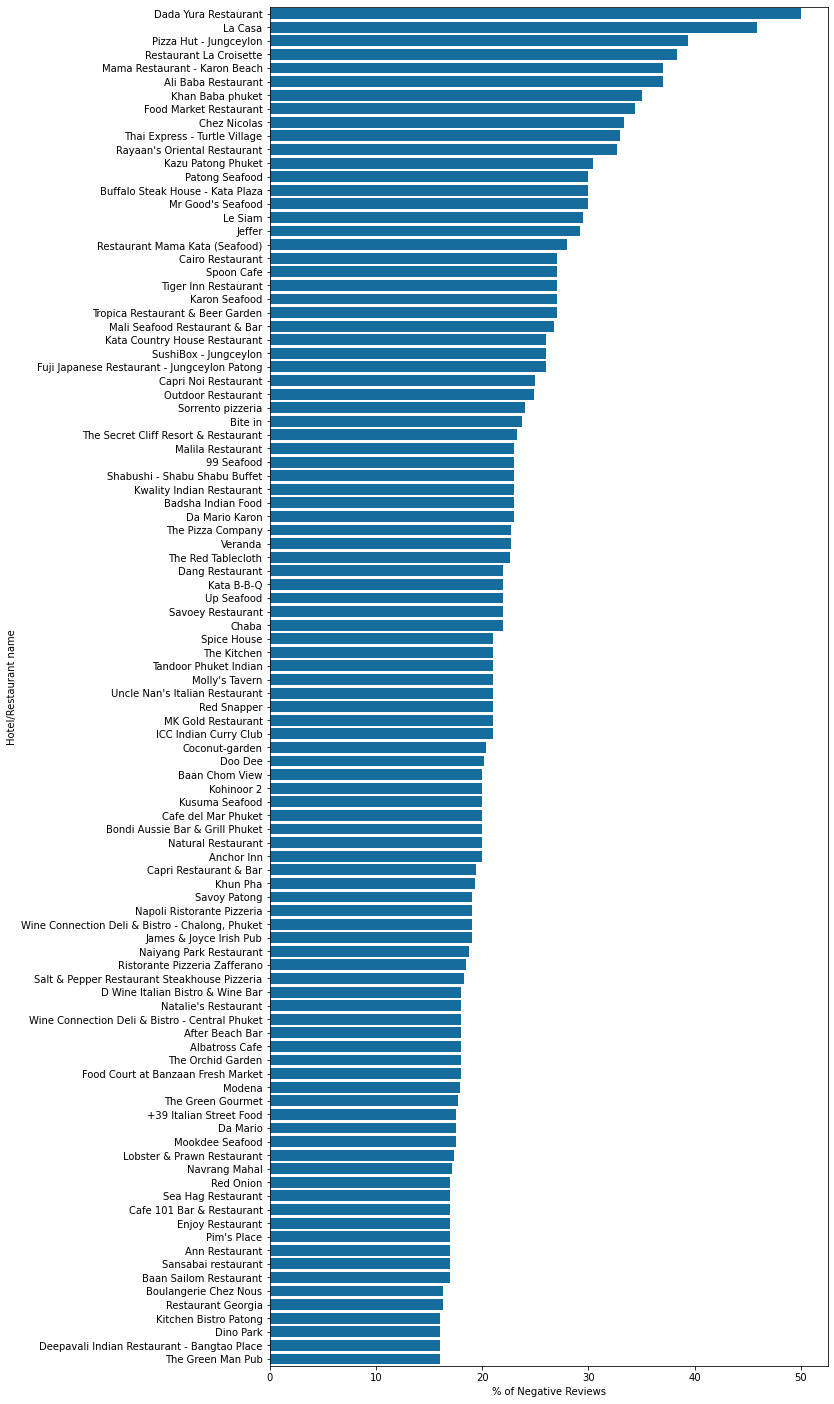

In [62]:
# viewing the bar plot of the first 100 negative sentiment

plt.figure(figsize=(10,25))
sns.barplot(data=pct_negative.head(100), x='% of Negative Reviews', y=pct_negative.head(100).index, color='#0072B2')

In [29]:
# applying the preprocess_text function positive and negative sentiments

tourism['processed_review'] = tourism['Review'].apply(preprocess_text)
tourism_positive_subsets = tourism.loc[(tourism['Hotel/Restaurant name']=='Patong Seafood') & 
                                                 (tourism['compound']>0),:]
tourism_negative_subsets = tourism.loc[(tourism['Hotel/Restaurant name']=='Patong Seafood') & 
                                                 (tourism['compound']<=0),:]

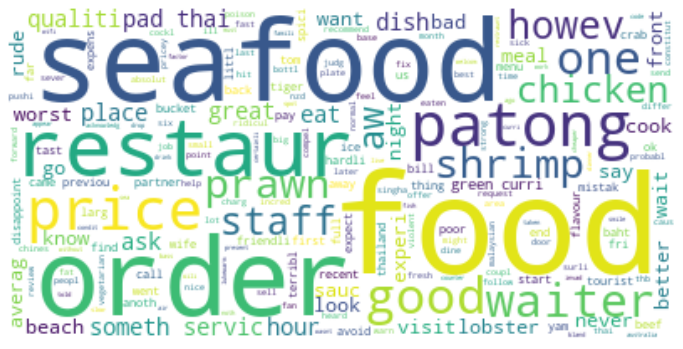

In [30]:
# wordCloud for negative reviews

neg_tokens = [word for review in tourism_negative_subsets['processed_review'] for word in review]
wordCloud = WordCloud(background_color = 'white').generate_from_text(' '.join(neg_tokens))
plt.figure(figsize=(12,12))
plt.imshow(wordCloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

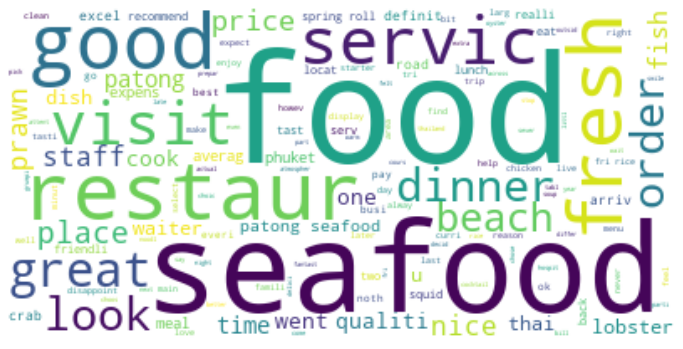

In [31]:
# wordCloud for positive reviews

pos_tokens = [word for review in tourism_positive_subsets['processed_review'] for word in review]
wordCloud = WordCloud(background_color = 'white').generate_from_text(' '.join(pos_tokens))
plt.figure(figsize=(12,12))
plt.imshow(wordCloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

   food seafood restaur    good   fresh  servic  patong   visit   great  dinner 
     47      40      26      24      23      21      20      17      16      14 
None


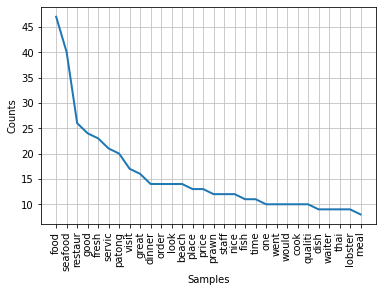

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [32]:
# plot of freq positive tokens 

pos_freqdist = FreqDist(pos_tokens)
print(pos_freqdist.tabulate(10))
pos_freqdist.plot(30)

   food seafood   order restaur  patong   price    good     one  waiter  shrimp 
     19      13      12      12      11      10       7       6       6       6 
None


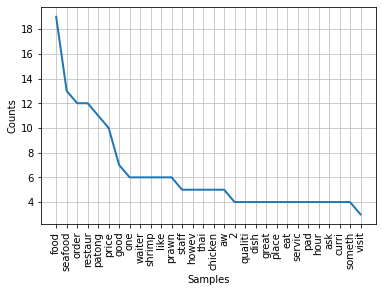

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [33]:
# plot of frequent negative tokens

neg_freqdist = FreqDist(neg_tokens)
print(neg_freqdist.tabulate(10))
neg_freqdist.plot(30)

In [40]:
first_10

,% of Negative Reviews
Hotel/Restaurant name,
Dada Yura Restaurant,50.000000
La Casa,45.833333
Pizza Hut - Jungceylon,39.393939
Restaurant La Croisette,38.297872
Mama Restaurant - Karon Beach,37.000000
Ali Baba Restaurant,37.000000
Khan Baba phuket,35.051546
Food Market Restaurant,34.343434
Chez Nicolas,33.333333
